In [76]:
import matplotlib.pyplot as plt
import numpy as np
from helpers_plot import initPlot, finalizePlot

# Example for custom $k$-binning

For some applications it might be useful to specify specific triangles at which the bispectrum should be measured. This can be done with BiG, as is shown in this file

## Create Input file for $k$-bins

First, we need to create an ASCII-input file, specifying the lower and upper $k$-bin edges and the bin center. We create a file with isosecles triangles with varying $k_1$ and fixed $k_1/k_2$ and $k_1/k_3$ ratios.

In [77]:
k1s=np.linspace(0.01, 0.91, 19)

binwidth=k1s[1:]-k1s[:-1]

#binwidth=0.1*np.ones_like(k1s)

k1_lows=[]
k2_lows=[]
k3_lows=[]

k1_cens=[]
k2_cens=[]
k3_cens=[]

k1_higs=[]
k2_higs=[]
k3_higs=[]

for i,k1 in enumerate(k1s[1:]):
    k1_low=k1-binwidth[i]/2
    k1_hig=k1+binwidth[i]/2

    k2=2*k1

    k3=2*k1

    k2_low=k2-binwidth[i]/2
    k2_hig=k2+binwidth[i]/2

    k3_low=k3-binwidth[i]/2
    k3_hig=k3+binwidth[i]/2

    k1_lows.append(k1_low)
    k2_lows.append(k2_low)
    k3_lows.append(k3_low)


    k1_cens.append(k1)
    k2_cens.append(k2)
    k3_cens.append(k3)

    k1_higs.append(k1_hig)
    k2_higs.append(k2_hig)
    k3_higs.append(k3_hig)

kbins=np.column_stack([k1_lows, k2_lows, k3_lows, k1_cens, k2_cens, k3_cens, k1_higs, k2_higs, k3_higs])

outfn="test_customKbins.dat"
np.savetxt(outfn, kbins)

## Run BiG

In [78]:
# Run BiG

!python ../scripts/runBispectrumExtractor_customKbins.py --L 1000 --Nmesh 512 --kbinFile test_customKbins.dat --outfn ../tests/testRun_output_customKbins_ --infiles ../tests/testRun_input.dat --verbose --doTiming --filetype numpy


Finished reading CMD line arguments
Settings:
Boxsize: 1000.0 Mpc/h
Grid Cells (1D): 512
Using ks from test_customKbins.dat
Reading density files from ../tests/testRun_input.dat
Writing output to ../tests/testRun_output_customKbins_
Finished setting members of bispectrumExtractor
Creating k-mesh
Finished initialization BispectrumExtractor
Finished calculating bispectrum norm
Needed 10.087791919708252 seconds to run
Calculating bispectrum for ../examples/test_grid_512_1.npy

Doing Fourier Transformation of density field
Doing Bispec calculation
Finished bispectrum calculation
Needed 10.263567686080933 seconds to run
Written output to ../tests/testRun_output_customKbins_test_grid_512_1.dat
Calculating bispectrum for ../examples/test_grid_512_2.npy
Doing Fourier Transformation of density field
Doing Bispec calculation
Finished bispectrum calculation
Needed 6.601661205291748 seconds to run
Written output to ../tests/testRun_output_customKbins_test_grid_512_2.dat


## Plots

We create a 3d-scatter plot to check if we are looking at the right $k$-configurations

In [79]:
# To make pretty plots
initPlot(labelsize=14, titlesize=14, legendsize=14, usetex=True, fontfamily='sans-serif')


In [80]:
# Load BiG Results
big_results_1=np.loadtxt("testRun_output_customKbins_test_grid_512_1.dat")

big_k_1=big_results_1[:,0]
big_k_2=big_results_1[:,1]
big_k_3=big_results_1[:,2]
big_Bk=big_results_1[:,5]


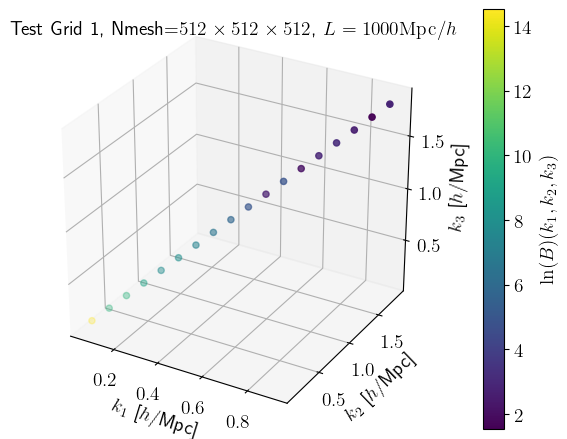

In [81]:
# Plot 

fig = plt.figure()

ax=fig.add_subplot(projection='3d')
ax.set_title(r"Test Grid 1, Nmesh=$512 \times 512 \times 512$, $L=1000 \mathrm{Mpc}/h$ ")


img=ax.scatter(big_k_1, big_k_2, big_k_3, c=np.log(np.abs(big_Bk)))
fig.colorbar(img, label=r'$\ln(B)(k_1, k_2, k_3)$')
ax.set_xlabel(r'$k_1$ [$h$/Mpc]')
ax.set_ylabel(r'$k_2$ [$h$/Mpc]')
ax.set_zlabel(r'$k_3$ [$h$/Mpc]')

finalizePlot(ax, outputFn="Testgrid1_customKbins.png", showlegend=False)